# Importación de las principales librerías

En esta sección del kernel vamos a cargar las principales librerías que vamos a usar en nuestro notebook.

In [1]:
# silence warnings
import warnings
warnings.filterwarnings("ignore")

# operating system
import os

# time calculation to track some processes
import time

# numeric and matrix operations
import math
import numpy as np
import pandas as pd

# scientific computations library
import scipy as sp

# loading ploting libraries
import matplotlib.pyplot as plt
%matplotlib inline

# import the function to compute cosine_similarity
import sklearn
from sklearn import set_config
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

In [2]:
PATH_FOLDER = os.path.join(os.getcwd(), "data_dsmarket")

In [3]:
set_config(transform_output = "pandas")

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importación de los datos

En la presente sección del kernel vamos a cargar los principales datasets que vamos a usar para construir nuestro cluster.

In [5]:
PATH_ANIME = os.path.join(PATH_FOLDER, '/content/drive/MyDrive/MASTER DATA SCIENCE/CAPSTONE/data_dsmarket/full_df.csv')

retail_df = pd.read_csv(PATH_ANIME)

In [6]:
retail_df.drop('Unnamed: 0', axis=1, inplace=True)

# Exploratory Data Analysis (EDA)

En la sección del EDA haremos **una primera aproximación a nuestros datos** para ver su composición y que variables tenemos a nuestra disposición.

In [7]:
def report_df(df, verbose = True):
    '''
    Hace un report simple sobre el DataFrame suministrado.
    '''
    print(df.info(verbose = verbose))
    total_nulos = df.isnull().sum().sum()
    print()
    print(f"Tenemos un total de {total_nulos} nulos")

In [8]:
report_df(retail_df)

retail_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8323770 entries, 0 to 8323769
Data columns (total 16 columns):
 #   Column              Dtype  
---  ------              -----  
 0   id                  object 
 1   date                object 
 2   item                object 
 3   category            object 
 4   department          object 
 5   store_code          object 
 6   region              object 
 7   store               object 
 8   sales_count         int64  
 9   event_NewYear       bool   
 10  event_None          bool   
 11  event_SuperBowl     bool   
 12  event_Thanksgiving  bool   
 13  event_Ramadan       bool   
 14  sell_price          float64
 15  revenue             float64
dtypes: bool(5), float64(2), int64(1), object(8)
memory usage: 738.2+ MB
None

Tenemos un total de 0 nulos


,id,date,item,category,department,store_code,region,store,sales_count,event_NewYear,event_None,event_SuperBowl,event_Thanksgiving,event_Ramadan,sell_price,revenue
0,ACCESORIES_1_001_NYC_1,2011-02-06,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,NYC_1,New York,Greenwich_Village,0,False,True,True,False,False,0.0,0.0
1,ACCESORIES_1_001_NYC_1,2011-02-13,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,NYC_1,New York,Greenwich_Village,0,False,True,False,False,False,0.0,0.0
2,ACCESORIES_1_001_NYC_1,2011-02-20,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,NYC_1,New York,Greenwich_Village,0,False,True,False,False,False,0.0,0.0
3,ACCESORIES_1_001_NYC_1,2011-02-27,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,NYC_1,New York,Greenwich_Village,0,False,True,False,False,False,0.0,0.0
4,ACCESORIES_1_001_NYC_1,2011-03-06,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,NYC_1,New York,Greenwich_Village,0,False,True,False,False,False,0.0,0.0


Podemos observar que los items más vendidos pertenecen a la categoría SUPERMARKET.

En concreto al departamento SUPERMARKET 3.

<Axes: title={'center': 'Items by category'}>

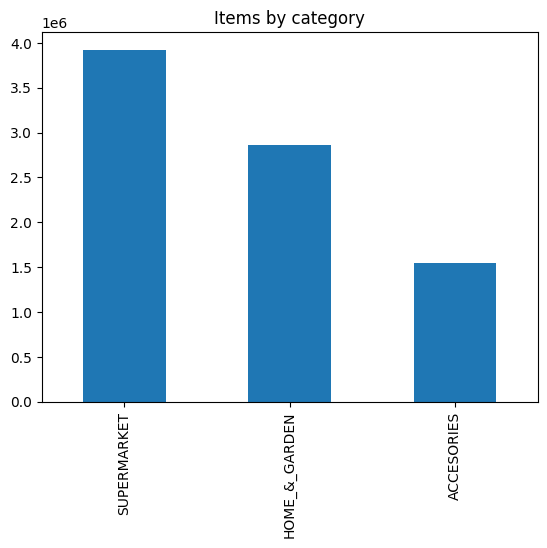

In [9]:
retail_df["category"].value_counts().plot(kind = "bar", title = "Items by category")

<Axes: title={'center': 'Items by department'}>

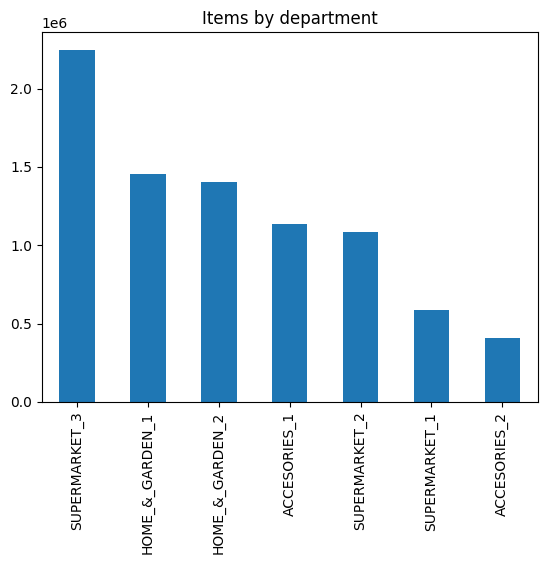

In [10]:
retail_df["department"].value_counts().plot(kind = "bar", title = "Items by department")

También observamos que los items que generan más ganancias pertenecen a la categoría SUPERMARKET.

El departamento con más ganancias es SUPERMARKET 3 seguido de HOME & GARDEN 1.

<Axes: title={'center': 'Revenue by category'}, xlabel='category'>

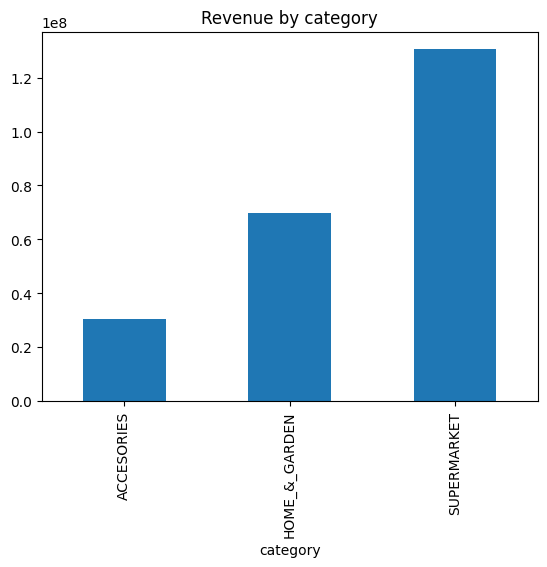

In [11]:
retail_df.groupby('category')["revenue"].sum().plot(kind = "bar", title = "Revenue by category")

<Axes: title={'center': 'Revenue by category'}, xlabel='department'>

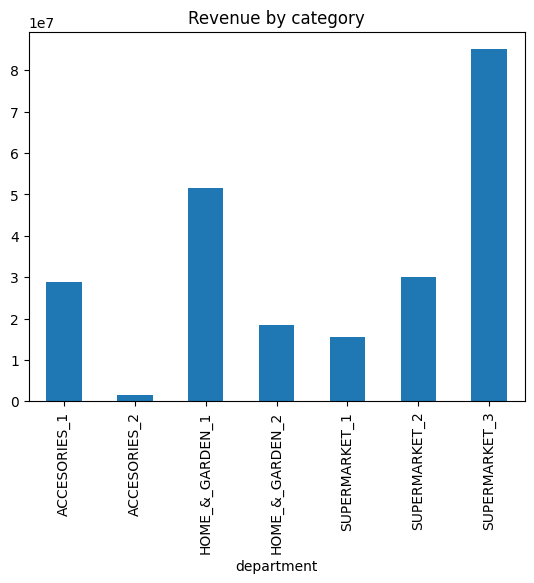

In [12]:
retail_df.groupby('department')["revenue"].sum().plot(kind = "bar", title = "Revenue by category")

In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [14]:
retail_df.head()

,id,date,item,category,department,store_code,region,store,sales_count,event_NewYear,event_None,event_SuperBowl,event_Thanksgiving,event_Ramadan,sell_price,revenue
0,ACCESORIES_1_001_NYC_1,2011-02-06,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,NYC_1,New York,Greenwich_Village,0,False,True,True,False,False,0.0,0.0
1,ACCESORIES_1_001_NYC_1,2011-02-13,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,NYC_1,New York,Greenwich_Village,0,False,True,False,False,False,0.0,0.0
2,ACCESORIES_1_001_NYC_1,2011-02-20,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,NYC_1,New York,Greenwich_Village,0,False,True,False,False,False,0.0,0.0
3,ACCESORIES_1_001_NYC_1,2011-02-27,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,NYC_1,New York,Greenwich_Village,0,False,True,False,False,False,0.0,0.0
4,ACCESORIES_1_001_NYC_1,2011-03-06,ACCESORIES_1_001,ACCESORIES,ACCESORIES_1,NYC_1,New York,Greenwich_Village,0,False,True,False,False,False,0.0,0.0


In [15]:
retail_df.columns

Index(['id', 'date', 'item', 'category', 'department', 'store_code', 'region',
       'store', 'sales_count', 'event_NewYear', 'event_None',
       'event_SuperBowl', 'event_Thanksgiving', 'event_Ramadan', 'sell_price',
       'revenue'],
      dtype='object')

In [16]:
retail_df['date'] = pd.to_datetime(retail_df['date'], format = '%Y-%m-%d')

In [17]:
retail_df['year'] = retail_df['date'].dt.year
retail_df['month'] = retail_df['date'].dt.month
retail_df['day'] = retail_df['date'].dt.day

In [18]:
retail_df.drop(['date', 'store'], axis=1, inplace=True)

In [19]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8323770 entries, 0 to 8323769
Data columns (total 17 columns):
 #   Column              Dtype  
---  ------              -----  
 0   id                  object 
 1   item                object 
 2   category            object 
 3   department          object 
 4   store_code          object 
 5   region              object 
 6   sales_count         int64  
 7   event_NewYear       bool   
 8   event_None          bool   
 9   event_SuperBowl     bool   
 10  event_Thanksgiving  bool   
 11  event_Ramadan       bool   
 12  sell_price          float64
 13  revenue             float64
 14  year                int64  
 15  month               int64  
 16  day                 int64  
dtypes: bool(5), float64(2), int64(4), object(6)
memory usage: 801.8+ MB


In [20]:
retail_df.set_index('id', inplace=True)

In [21]:
retail_df['item'].nunique()

3049

In [22]:
sample = retail_df['item'].sample(200)

In [23]:
sampled_df = retail_df[retail_df['item'].isin(sample)]

In [24]:
sampled_df

,item,category,department,store_code,region,sales_count,event_NewYear,event_None,event_SuperBowl,event_Thanksgiving,event_Ramadan,sell_price,revenue,year,month,day
id,,,,,,,,,,,,,,,,
ACCESORIES_1_012_NYC_1,ACCESORIES_1_012,ACCESORIES,ACCESORIES_1,NYC_1,New York,2,False,True,True,False,False,7.9534,15.9068,2011,2,6
ACCESORIES_1_012_NYC_1,ACCESORIES_1_012,ACCESORIES,ACCESORIES_1,NYC_1,New York,4,False,True,False,False,False,7.9534,31.8136,2011,2,13
ACCESORIES_1_012_NYC_1,ACCESORIES_1_012,ACCESORIES,ACCESORIES_1,NYC_1,New York,9,False,True,False,False,False,7.9534,71.5806,2011,2,20
ACCESORIES_1_012_NYC_1,ACCESORIES_1_012,ACCESORIES,ACCESORIES_1,NYC_1,New York,3,False,True,False,False,False,7.9534,23.8602,2011,2,27
ACCESORIES_1_012_NYC_1,ACCESORIES_1_012,ACCESORIES,ACCESORIES_1,NYC_1,New York,1,False,True,False,False,False,7.9534,7.9534,2011,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SUPERMARKET_3_827_PHI_3,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,PHI_3,Philadelphia,17,False,True,False,False,False,1.2000,20.4000,2016,3,27
SUPERMARKET_3_827_PHI_3,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,PHI_3,Philadelphia,22,False,True,False,False,False,1.2000,26.4000,2016,4,3
SUPERMARKET_3_827_PHI_3,SUPERMARKET_3_827,SUPERMARKET,SUPERMARKET_3,PHI_3,Philadelphia,8,False,True,False,False,False,1.2000,9.6000,2016,4,10


In [25]:

ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(categories='auto', sparse_output=False), ['item', 'category', 'department', 'store_code', 'region'])],   # The column numbers to be transformed (here is [0] but can be [0, 1, 3])
    remainder='passthrough'                                         # Leave the rest of the columns untouched
)

df_encoded = ct.fit_transform(sampled_df)

In [26]:
df_encoded

,one_hot_encoder__item_ACCESORIES_1_012,one_hot_encoder__item_ACCESORIES_1_026,one_hot_encoder__item_ACCESORIES_1_043,one_hot_encoder__item_ACCESORIES_1_057,one_hot_encoder__item_ACCESORIES_1_100,one_hot_encoder__item_ACCESORIES_1_121,one_hot_encoder__item_ACCESORIES_1_127,one_hot_encoder__item_ACCESORIES_1_141,one_hot_encoder__item_ACCESORIES_1_148,one_hot_encoder__item_ACCESORIES_1_169,...,remainder__event_NewYear,remainder__event_None,remainder__event_SuperBowl,remainder__event_Thanksgiving,remainder__event_Ramadan,remainder__sell_price,remainder__revenue,remainder__year,remainder__month,remainder__day
id,,,,,,,,,,,,,,,,,,,,,
ACCESORIES_1_012_NYC_1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,True,True,False,False,7.9534,15.9068,2011,2,6
ACCESORIES_1_012_NYC_1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,True,False,False,False,7.9534,31.8136,2011,2,13
ACCESORIES_1_012_NYC_1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,True,False,False,False,7.9534,71.5806,2011,2,20
ACCESORIES_1_012_NYC_1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,True,False,False,False,7.9534,23.8602,2011,2,27
ACCESORIES_1_012_NYC_1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,True,False,False,False,7.9534,7.9534,2011,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SUPERMARKET_3_827_PHI_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,True,False,False,False,1.2000,20.4000,2016,3,27
SUPERMARKET_3_827_PHI_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,True,False,False,False,1.2000,26.4000,2016,4,3
SUPERMARKET_3_827_PHI_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,True,False,False,False,1.2000,9.6000,2016,4,10


In [32]:
st = time.time()

pca = PCA(n_components = 10)
pca.fit(df_encoded)
pca_df = pca.transform(df_encoded)

et = time.time()
print("Total PCA took {} minutes".format(round((et - st)/60, 2)))

Total PCA took 0.45 minutes


In [33]:
pca_df

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9
id,,,,,,,,,,
ACCESORIES_1_012_NYC_1,-20.279888,-1.238456,-9.685009,3.491889,4.135995,2.936926,0.017545,-0.869052,-0.020523,-1.083868
ACCESORIES_1_012_NYC_1,-5.194169,-6.627919,-2.668670,3.029513,4.169311,2.951108,0.046554,-0.856884,-0.016837,-1.095585
ACCESORIES_1_012_NYC_1,32.526280,-20.113976,4.364436,1.919683,4.185888,2.973122,0.117517,-0.826879,-0.007766,-1.124327
ACCESORIES_1_012_NYC_1,-12.747276,-3.912517,11.323836,3.182598,4.292603,2.970006,0.035392,-0.862205,-0.018428,-1.091286
ACCESORIES_1_012_NYC_1,-27.824672,1.461425,-9.679992,3.737122,3.141303,2.840483,0.007680,-0.874771,-0.022381,-1.080356
...,...,...,...,...,...,...,...,...,...,...
SUPERMARKET_3_827_PHI_3,-9.506552,10.578746,11.298598,-2.157154,3.672830,-2.714460,-0.636736,0.506302,0.810968,0.109130
SUPERMARKET_3_827_PHI_3,-1.879230,12.291231,-12.688804,-1.906772,2.486146,-2.838948,-0.633115,0.505064,0.811042,0.107791
SUPERMARKET_3_827_PHI_3,-23.200128,7.428014,-5.697199,-2.256855,2.527822,-2.842371,-0.643184,0.506544,0.809790,0.110822


In [34]:
sum(pca.explained_variance_ratio_)

0.9998059344568796

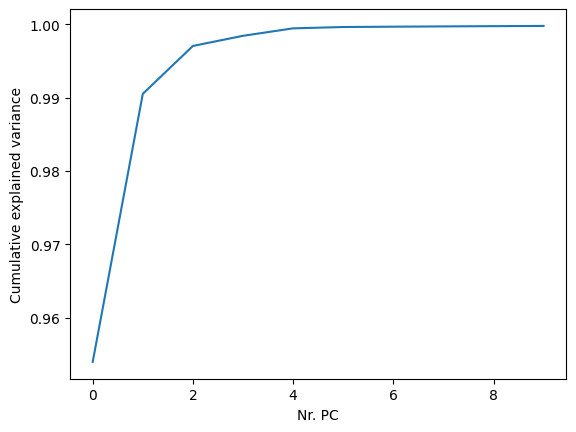

In [35]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Nr. PC')
plt.ylabel('Cumulative explained variance');

In [36]:
st = time.time()

sse = {}

for k in range(1, 8):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(pca_df)
    sse[k] = kmeans.inertia_
    
et = time.time()
print("Total Elbow curve took {} minutes".format(round((et - st)/60, 2)))

Total Elbow curve took 0.96 minutes


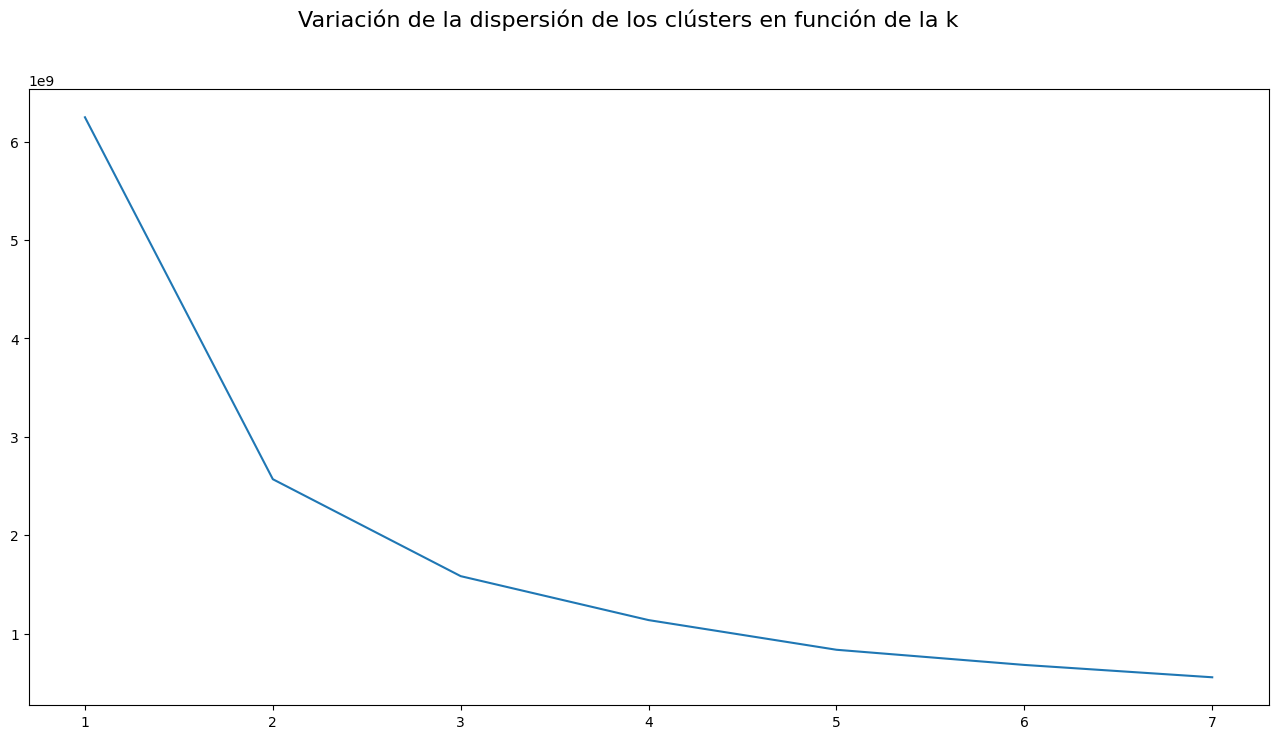

In [37]:
fig = plt.figure(figsize = (16, 8))
ax = fig.add_subplot()

x_values = list(sse.keys())
y_values = list(sse.values())

ax.plot(x_values, y_values, label = "Inertia/dispersión de los clústers")
ax.set_xticks(np.arange(1, 8))
fig.suptitle("Variación de la dispersión de los clústers en función de la k", fontsize = 16);

In [38]:
kmeans = KMeans(n_clusters = 5)
kmeans.fit(pca_df)

KMeans(n_clusters=5)

In [39]:
sampled_df["cluster"] = kmeans.labels_

In [41]:
sampled_df.groupby("cluster").size()

cluster
0     71512
1       449
2      2553
3      9503
4    445603
dtype: int64